In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [6]:
c_data = pd.read_csv('benchmarking/results/c_benchmark.csv')
java_data = pd.read_csv('benchmarking/results/java_benchmark.csv')
ts_data = pd.read_csv('benchmarking/results/ts_benchmark.csv')

c_mult_data = pd.read_csv('benchmarking/results/c_multicore_benchmark.csv')

def get_rounded_means(array):
    return list(map(lambda x: round(x,2), array["mean"].to_numpy()))

# Single Thread

## Runtime of the algorithm in different languages

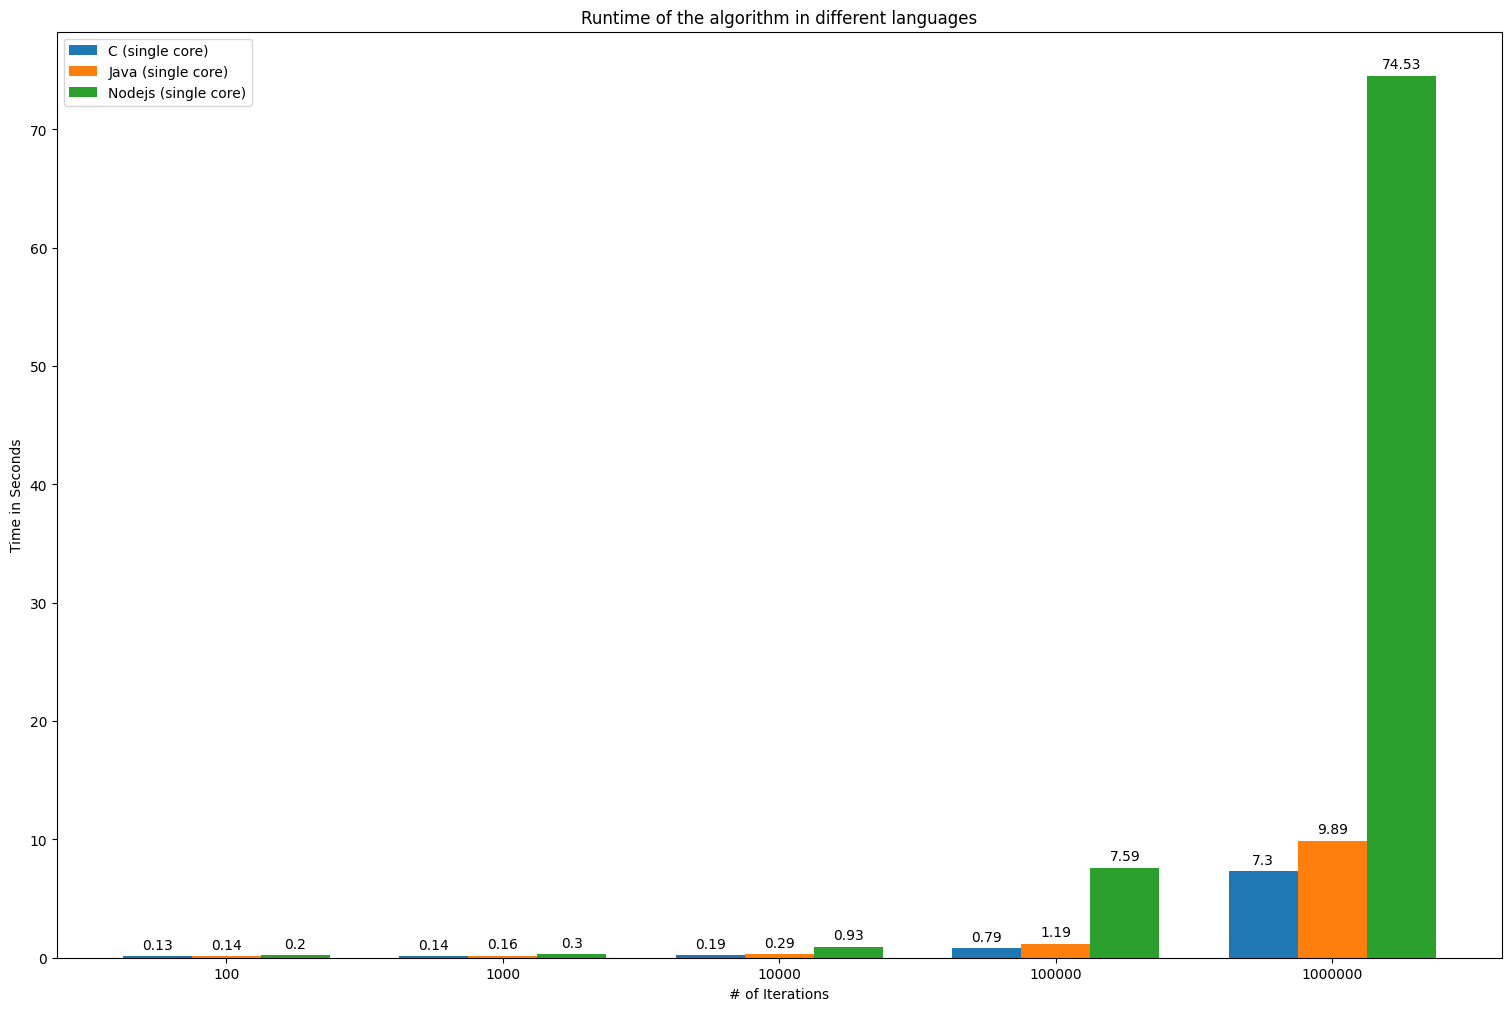

In [4]:
runs = c_data["parameter_runs"].to_numpy()
means = {
    "C (single core)": get_rounded_means(c_data),
    "Java (single core)": get_rounded_means(java_data),
    "Nodejs (single core)": get_rounded_means(ts_data),
}

x = np.arange(len(runs))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout="constrained", figsize=(15, 10))

for attribute, measurement in means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_xlabel("# of Iterations")
ax.set_ylabel("Time in Seconds")
ax.set_xticks(x + width, runs)
ax.legend(loc="upper left")
# ax.set_ylim(0, 250)

plt.show()


# Multiple threads

## Iterations per second of the algorithm in C with different number of threads

Text(0, 0.5, 'Iterations per second')

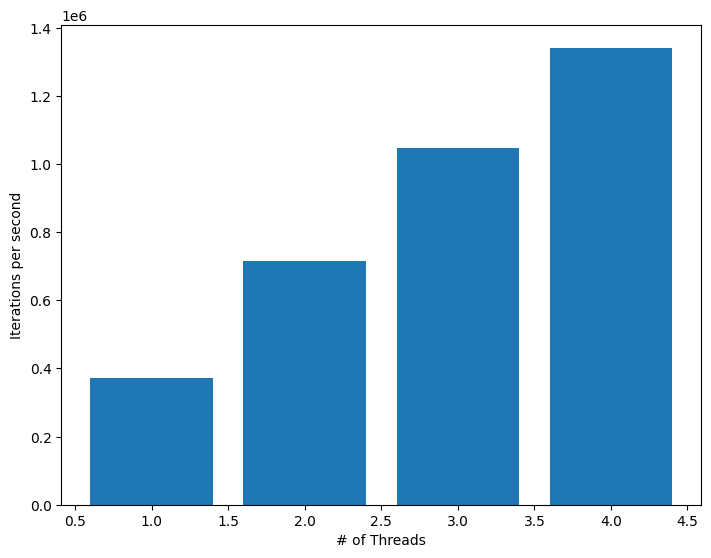

In [22]:
runs = c_mult_data["parameter_num_threads"].to_numpy()
means = [{'mean': x, 'threads':i+1} for i, x in enumerate(c_mult_data["mean"].to_numpy())]
iterations_per_second=list(map(lambda x: round(x['threads']*1000000/x['mean'],2), means))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(runs,iterations_per_second)
ax.set_xlabel("# of Threads")
ax.set_ylabel("Iterations per second")

## Runtime of the algorithm in C with different number of threads and 1000000 iterations per thread

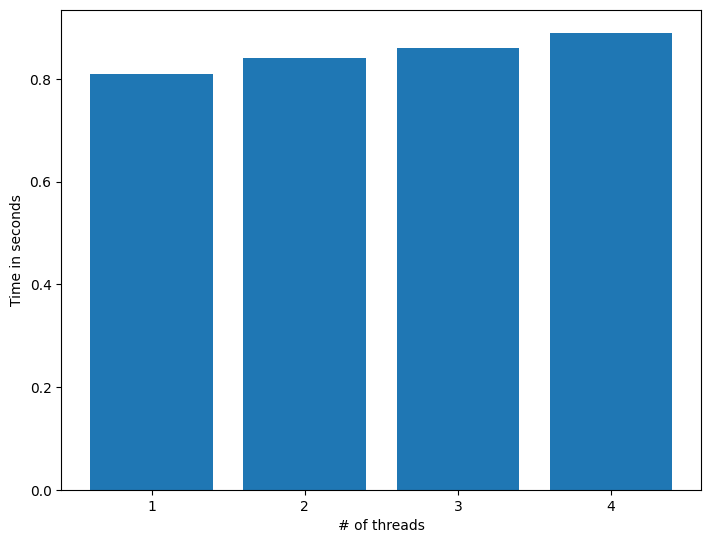

In [23]:
runs = c_mult_data["parameter_num_threads"].to_numpy()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(runs,get_rounded_means(c_mult_data))
ax.set_xticks(runs)
ax.set_xlabel("# of threads")
ax.set_ylabel("Time in seconds")
plt.show()